In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost.sklearn import XGBClassifier   

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import KBinsDiscretizer

from imblearn.over_sampling import SMOTE

import shap

# E-Commerce KlikMart

## Latar Belakang

KlikMart adalah perusahaan E-commerce di Indonesia yang menyediakan berbagai kebutuhan sehari-hari secara online. Dengan layanan pengiriman langsung dari gudang ke rumah serta program loyalitas seperti cashback dan promo, KlikMart berhasil menarik jutaan pelanggan sejak berdiri pada tahun 2016.

Namun, meningkatnya persaingan di industri E-commerce membuat KlikMart menghadapi tantangan dalam mempertahankan pelanggannya. Data internal menunjukkan adanya tren peningkatan churn atau hilangnya pelanggan dari bulan ke bulan. Kondisi ini menjadi krusial karena biaya untuk mempertahankan satu pelanggan hanya sekitar $50, jauh lebih rendah dibandingkan biaya untuk memperoleh pelanggan baru yang mencapai $150. Oleh karena itu, strategi retensi yang tepat sasaran menjadi semakin penting secara bisnis.

Sebagai respons terhadap tantangan ini, KlikMart mulai memanfaatkan pendekatan berbasis Machine Learning untuk memprediksi perilaku pelanggan, khususnya dalam mengidentifikasi pelanggan yang berisiko churn. Dengan menggunakan data historis seperti lama berlangganan, jarak pengiriman, jumlah perangkat terdaftar, keluhan, dan kepuasan layanan, perusahaan berharap dapat membangun model prediktif yang mampu mendeteksi risiko churn lebih awal.

Melalui model ini, KlikMart dapat melakukan intervensi secara tepat kepada pelanggan yang benar-benar membutuhkan, seperti penawaran personalisasi atau peningkatan layanan, sehingga strategi retensi dapat dijalankan secara lebih efisien dan berdampak.

## Rumusan Masalah

Bagaimana membangun model prediksi churn yang mampu secara optimal mengidentifikasi pelanggan yang berisiko churn agar perusahaan dapat melakukan tindakan pencegahan secara tepat sasaran?

## Load Dataset

In [5]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


## Data Understanding 

- Tenure: Lama waktu (dalam hari/bulan/tahun) pelanggan telah bergabung atau menggunakan layanan perusahaan.

- WarehouseToHome: Jarak antara gudang penyimpanan barang ke rumah pelanggan.

- NumberOfDeviceRegistered: Jumlah perangkat (device) yang terdaftar oleh pelanggan untuk mengakses layanan.

- PreferedOrderCat: Kategori produk yang paling sering atau terakhir dipesan oleh pelanggan dalam satu bulan terakhir.

- SatisfactionScore: Skor kepuasan pelanggan terhadap layanan yang diberikan, biasanya dalam skala tertentu (misalnya 1–5).

- MaritalStatus: Status pernikahan pelanggan, seperti "Single" atau "Married".

- NumberOfAddress: Jumlah alamat yang telah ditambahkan oleh pelanggan ke akun mereka (misalnya alamat rumah, kantor, dll).

- Complaint: Menunjukkan apakah pelanggan pernah mengajukan keluhan dalam satu bulan terakhir (biasanya 0 = tidak, 1 = ya).

- DaySinceLastOrder: Jumlah hari sejak terakhir kali pelanggan melakukan pemesanan.

- CashbackAmount: Rata-rata nilai cashback yang diterima pelanggan dalam satu bulan terakhir.

- Churn: Label apakah pelanggan berhenti menggunakan layanan (1 = churn, 0 = tidak churn).

## EDA & Data Cleanning

In [6]:
df.duplicated().sum()

np.int64(671)

In [7]:
df[df.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(3270, 11)

**Alasan di hilangkan:** 

Menghapus data mirip atau duplikat mengurangi ukuran dataset tanpa mengorbankan keberagaman data, yang membantu proses training jadi lebih cepat dan efisien.

In [10]:
df.isnull().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

**Alasan di pertahankan :**
- Fitur seperti Tenure, WarehouseToHome, dan DaySinceLastOrder hanya memiliki 5–7% missing values, sementara total data adalah 3000 baris.

- Menghapus baris-baris tersebut akan membuang sekitar 500 baris data (±17%), yang terlalu besar untuk dihilangkan begitu saja.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3270 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3135 non-null   float64
 2   NumberOfDeviceRegistered  3270 non-null   int64  
 3   PreferedOrderCat          3270 non-null   object 
 4   SatisfactionScore         3270 non-null   int64  
 5   MaritalStatus             3270 non-null   object 
 6   NumberOfAddress           3270 non-null   int64  
 7   Complain                  3270 non-null   int64  
 8   DaySinceLastOrder         3089 non-null   float64
 9   CashbackAmount            3270 non-null   float64
 10  Churn                     3270 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.6+ KB


In [12]:
df.describe(include='all')

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270,3270.000000,3270,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
unique,NaN,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1213,NaN,1686,NaN,NaN,NaN,NaN,NaN
mean,10.190354,15.510367,3.676453,NaN,3.020795,NaN,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,NaN,1.395113,NaN,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,7.000000,197.137500,0.000000


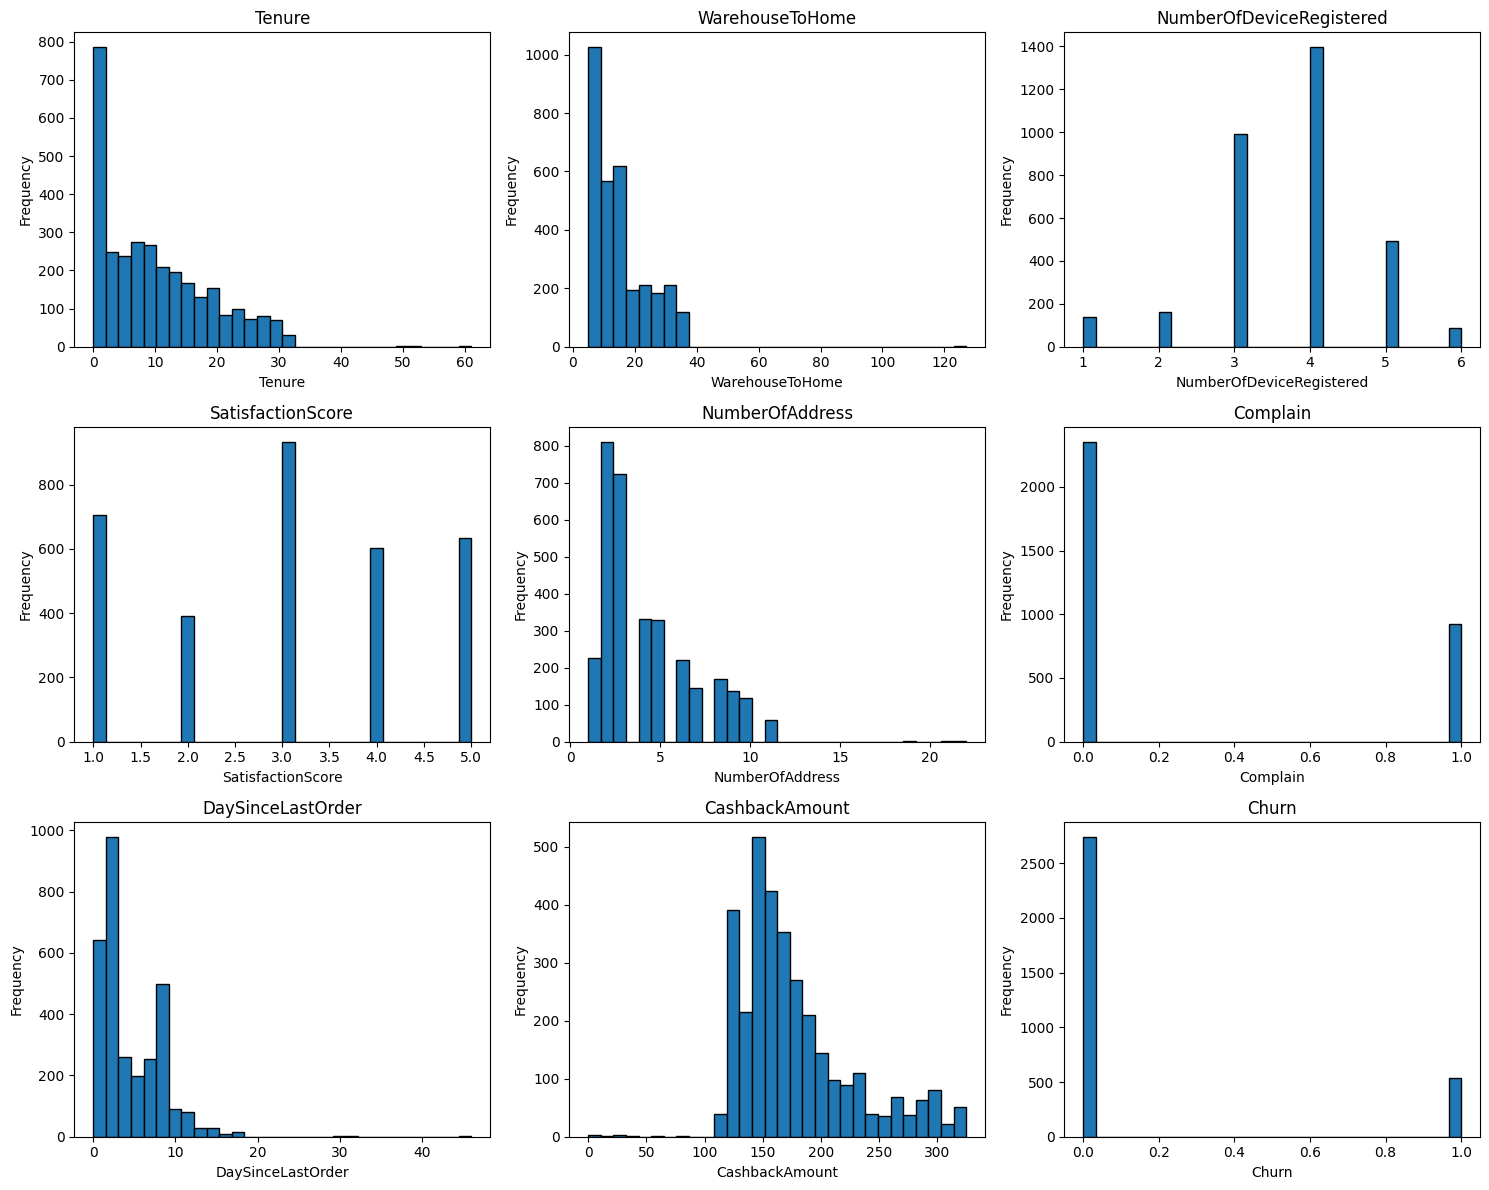

In [13]:
# Distribusi data

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

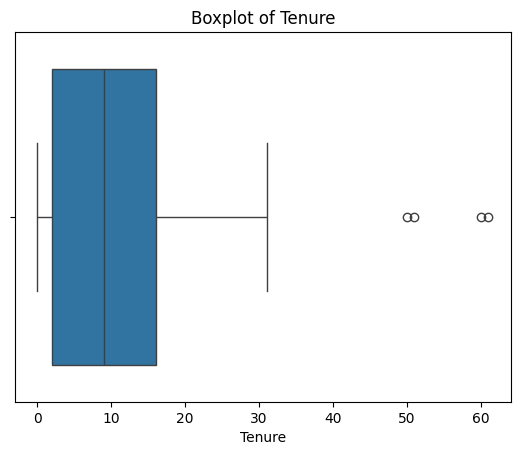

In [14]:
sns.boxplot(data=df, x='Tenure')

plt.xlabel('Tenure')        
plt.title('Boxplot of Tenure')  

plt.show()

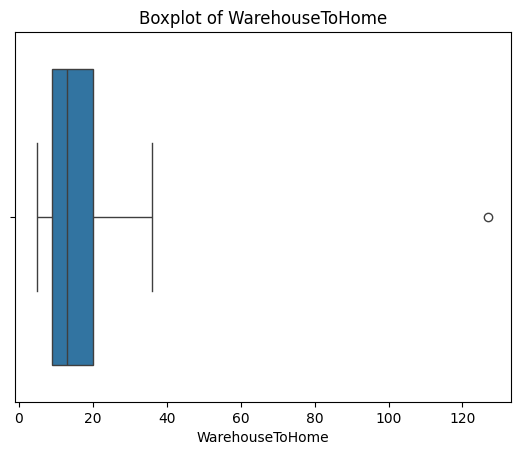

In [15]:
sns.boxplot(data=df, x='WarehouseToHome')

plt.xlabel('WarehouseToHome')        
plt.title('Boxplot of WarehouseToHome')  

plt.show()

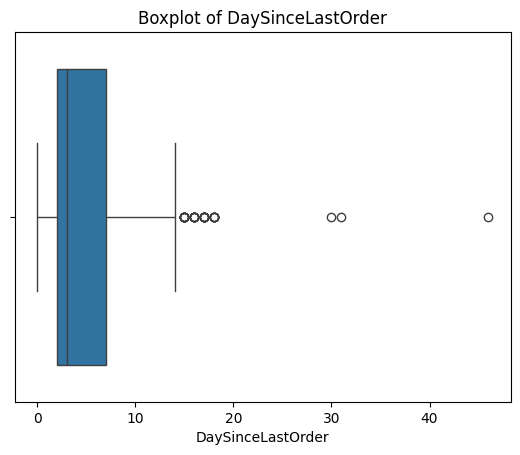

In [16]:
sns.boxplot(data=df, x='DaySinceLastOrder')

plt.xlabel('DaySinceLastOrder')        
plt.title('Boxplot of DaySinceLastOrder')  

plt.show()

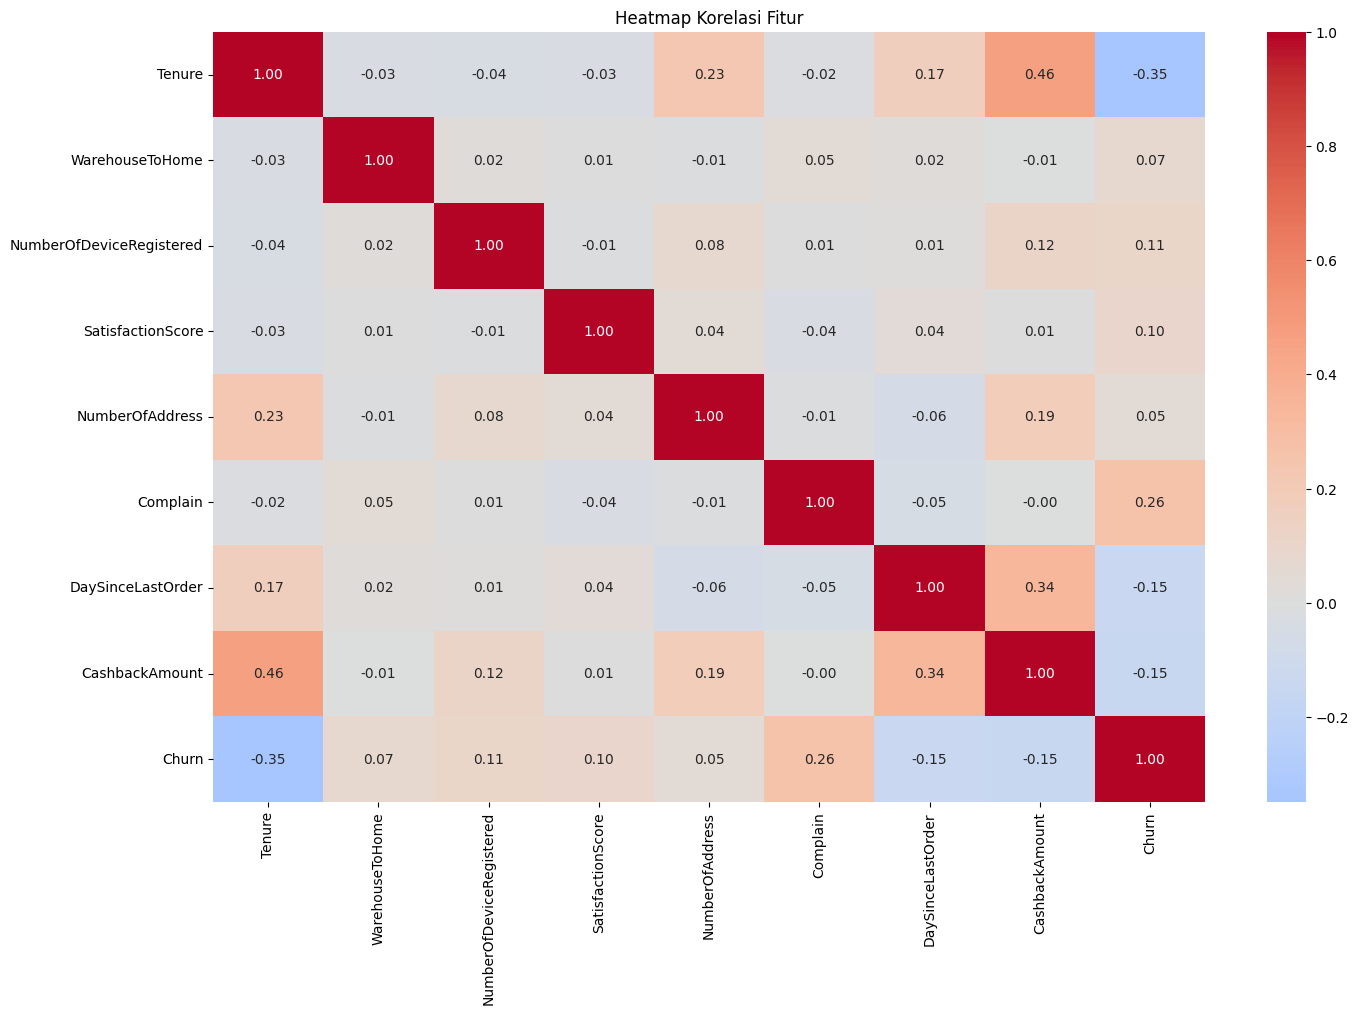

In [17]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi Fitur')
plt.show()

**Insight :**

1. Tenure (-0.35) → Korelasi negatif cukup kuat, artinya semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka churn. Pelanggan baru cenderung lebih berisiko churn.

2. Complain (0.26) → Korelasi positif moderat, menunjukkan pelanggan yang mengajukan keluhan lebih berpotensi churn.

3. NumberOfDeviceRegistered (0.11) dan SatisfactionScore (0.10) → Korelasi positif lemah, namun tetap menunjukkan sedikit kecenderungan bahwa semakin tinggi nilai ini, kemungkinan churn bertambah.

4. WarehouseToHome (0.07) dan NumberOfAddress (0.05) → Korelasi sangat lemah terhadap churn, indikasinya mungkin tidak terlalu signifikan untuk prediksi.

5. DaySinceLastOrder (-0.15) dan CashbackAmount (-0.15) → Korelasi negatif lemah; semakin lama sejak terakhir order atau semakin kecil cashback yang diterima, sedikit meningkatkan risiko churn.

C:\Users\Farhan Wijonarko\AppData\Local\Temp\ipykernel_19608\1131546132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Churn', y='Tenure', estimator = 'median', palette = 'pastel')
C:\Users\Farhan Wijonarko\AppData\Local\Temp\ipykernel_19608\1131546132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Churn', y='WarehouseToHome', estimator = 'median', palette = 'pastel')
C:\Users\Farhan Wijonarko\AppData\Local\Temp\ipykernel_19608\1131546132.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Churn

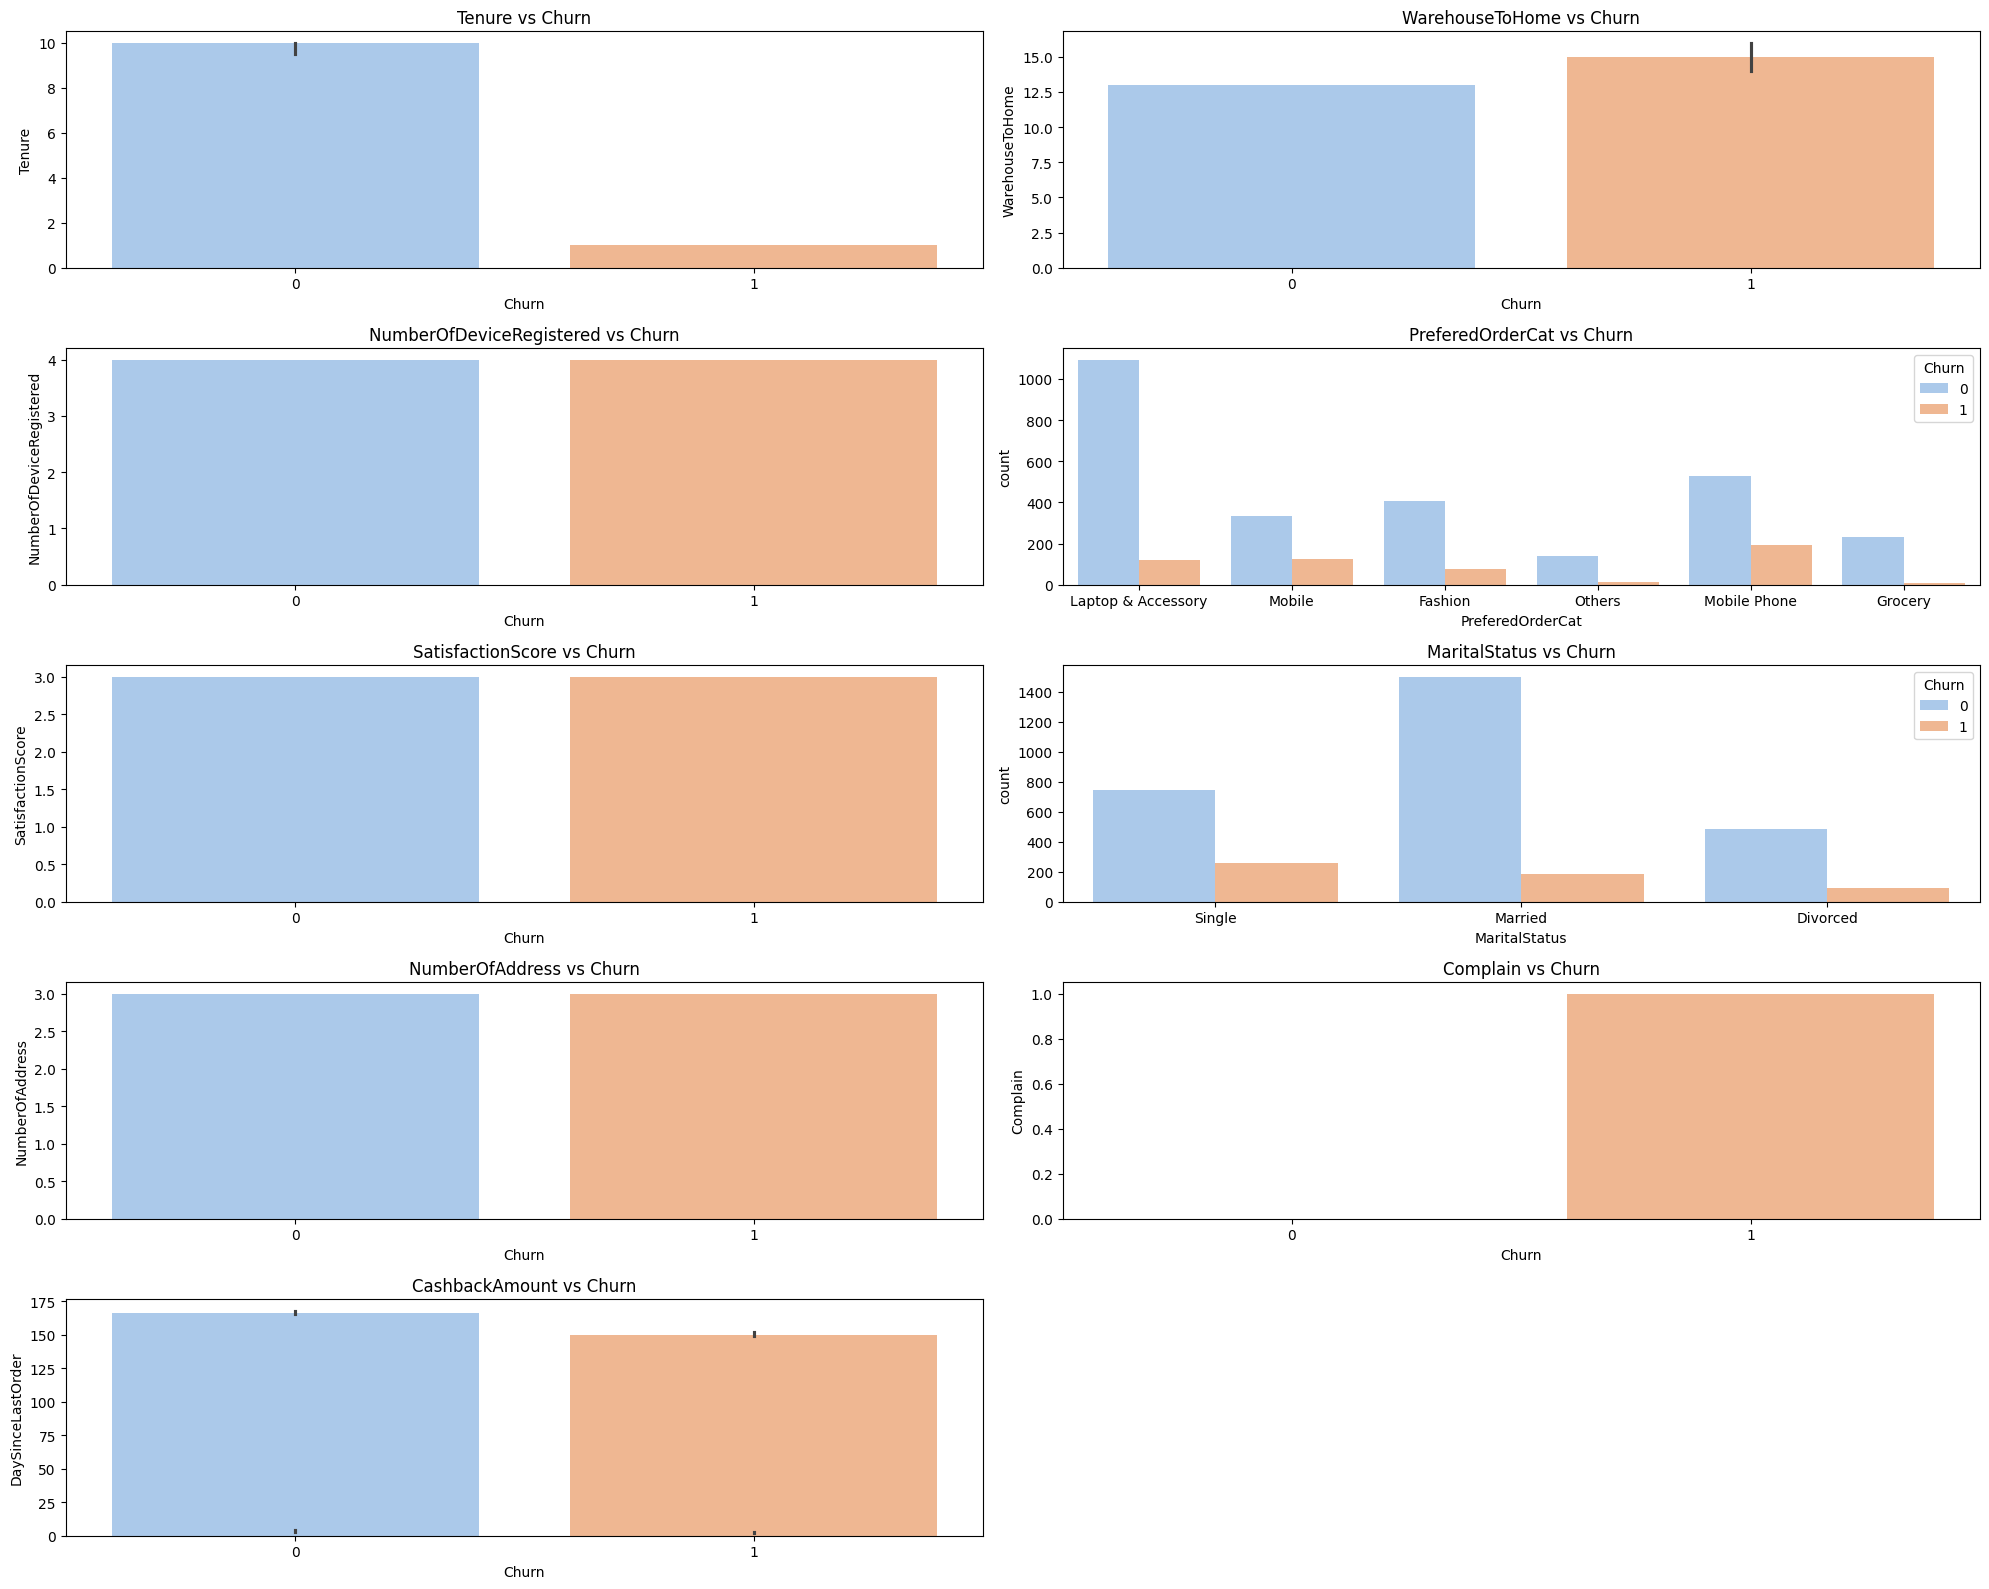

In [18]:
plt.figure(figsize=(20,16))

plt.subplot(5,2,1)
sns.barplot(data=df, x='Churn', y='Tenure', estimator = 'median', palette = 'pastel')
plt.title('Tenure vs Churn')

plt.subplot(5,2,2)
sns.barplot(data=df, x='Churn', y='WarehouseToHome', estimator = 'median', palette = 'pastel')
plt.title('WarehouseToHome vs Churn')

plt.subplot(5,2,3)
sns.barplot(data=df, x='Churn', y='NumberOfDeviceRegistered', estimator = 'median', palette = 'pastel')
plt.title('NumberOfDeviceRegistered vs Churn')

plt.subplot(5,2,4)
sns.countplot(data=df, x='PreferedOrderCat', hue = 'Churn', palette = 'pastel')
plt.title('PreferedOrderCat vs Churn')

plt.subplot(5,2,5)
sns.barplot(data=df, x='Churn', y='SatisfactionScore', estimator = 'median', palette = 'pastel')
plt.title('SatisfactionScore vs Churn')

plt.subplot(5,2,6)
sns.countplot(data=df, x='MaritalStatus', hue = 'Churn', palette = 'pastel')
plt.title('MaritalStatus vs Churn')

plt.subplot(5,2,7)
sns.barplot(data=df, x='Churn', y='NumberOfAddress', estimator = 'median', palette = 'pastel')
plt.title('NumberOfAddress vs Churn')

plt.subplot(5,2,8)
sns.barplot(data=df, x='Churn', y='Complain', estimator = 'median', palette = 'pastel')
plt.title('Complain vs Churn')

plt.subplot(5,2,9)
sns.barplot(data=df, x='Churn', y='DaySinceLastOrder', estimator = 'median', palette = 'pastel')
plt.title('DaySinceLastOrder vs Churn')

plt.subplot(5,2,9)
sns.barplot(data=df, x='Churn', y='CashbackAmount', estimator = 'median', palette = 'pastel')
plt.title('CashbackAmount vs Churn')

plt.tight_layout()

**INSIGHT :**

- Tenure vs Churn

    Pelanggan yang churn cenderung memiliki masa langganan (tenure) yang lebih pendek dibanding yang tidak churn. Artinya, pelanggan baru lebih rentan untuk berhenti.

- WarehouseToHome vs Churn

    Pelanggan yang churn memiliki jarak pengiriman yang sedikit lebih jauh dari gudang ke rumah. Ini bisa jadi faktor ketidakpuasan terkait kecepatan atau efisiensi pengiriman.

- NumberOfDeviceRegistered vs Churn

    Jumlah perangkat yang terdaftar hampir seragam, namun terlihat churn lebih sedikit pada pelanggan dengan jumlah perangkat lebih banyak, yang bisa menandakan loyalitas lebih tinggi.

- PreferedOrderCat vs Churn

    Pelanggan dengan preferensi Mobile dan Fashion memiliki proporsi churn yang lebih tinggi dibanding kategori lain seperti Grocery atau Laptop & Accessory. Produk-produk impulsif kemungkinan lebih rawan churn.

- SatisfactionScore vs Churn

    Pelanggan yang churn memiliki skor kepuasan yang cenderung lebih rendah. Ini mengindikasikan kepuasan sangat berperan dalam mempertahankan pelanggan.

- MaritalStatus vs Churn

    Pelanggan lajang memiliki kemungkinan churn yang lebih tinggi dibandingkan menikah atau cerai. Bisa jadi karena daya beli atau keterikatan emosional lebih rendah.

- NumberOfAddress vs Churn

    Tidak terlihat perbedaan signifikan, namun pelanggan dengan jumlah alamat lebih banyak cenderung churn sedikit lebih rendah — bisa jadi tanda pelanggan aktif.

- Complain vs Churn

    Hampir semua pelanggan yang churn pernah melakukan komplain. Ini insight sangat kuat: komplain adalah indikator churn yang sangat tinggi.

- CashbackAmount vs Churn

    Cashback yang diterima pelanggan churn tampaknya sedikit lebih rendah. Pemberian insentif yang cukup bisa membantu mengurangi churn.

## Define X dan y

In [19]:
X = df.drop(columns='Churn')
y = df['Churn']

## Data Spliting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [21]:
y.value_counts()

Churn
0    2736
1     534
Name: count, dtype: int64

In [22]:
total = len(y)
perc_0 = (y.value_counts()[0] / total) * 100
perc_1 = (y.value_counts()[1] / total) * 100

print(f"Class 0 (Not Churn): {perc_0:.2f}%")
print(f"Class 1 (Churn): {perc_1:.2f}%")

Class 0 (Not Churn): 83.67%
Class 1 (Churn): 16.33%


Penelitian ini menggunakan F3-score sebagai metrik evaluasi karena lebih menekankan recall, sehingga lebih efektif dalam mengidentifikasi pelanggan yang berisiko churn. Mengingat biaya akuisisi pelanggan baru ($150) jauh lebih tinggi dibandingkan biaya retensi ($50), kesalahan dalam tidak mendeteksi pelanggan churn (false negative) harus diminimalkan. Selain itu, data menunjukkan ketidakseimbangan kelas, dengan Class 0 sebesar 83.67% dan Class 1 sebesar 16.33%, sehingga fokus pada deteksi churn menjadi prioritas.

## Preprocessing

In [23]:
# Resampling 
smote = SMOTE(random_state=0)

In [24]:
# Buat Pipeline untuk menggabungkan imputer dan scaler
pipe_sime_robust = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('robust', RobustScaler())
])

In [25]:
transformer = ColumnTransformer([
    ('pipe_sime_robust', pipe_sime_robust, ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
    ('scaler', RobustScaler(), ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount']),
    ('encoding', OneHotEncoder(), ['PreferedOrderCat', 'MaritalStatus'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_sime_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('scaler', RobustScaler(),
                                 ['NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'CashbackAmount']),
                                ('encoding', OneHotEncoder(),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

In [26]:
X_test_Prep = transformer.fit_transform(X_test)
X_train_Prep = transformer.fit_transform(X_train)

In [27]:
X_train_df = pd.DataFrame(X_train_Prep, columns=transformer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_Prep, columns=transformer.get_feature_names_out())
X_train_df

,pipe_sime_robust__Tenure,pipe_sime_robust__WarehouseToHome,pipe_sime_robust__DaySinceLastOrder,scaler__NumberOfDeviceRegistered,scaler__SatisfactionScore,scaler__NumberOfAddress,scaler__CashbackAmount,encoding__PreferedOrderCat_Fashion,encoding__PreferedOrderCat_Grocery,encoding__PreferedOrderCat_Laptop & Accessory,encoding__PreferedOrderCat_Mobile,encoding__PreferedOrderCat_Mobile Phone,encoding__PreferedOrderCat_Others,encoding__MaritalStatus_Divorced,encoding__MaritalStatus_Married,encoding__MaritalStatus_Single,remainder__Complain
0,0.000000,0.1,-0.2,1.0,-1.0,0.00,-0.233936,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.666667,1.0,0.0,0.0,0.5,2.00,-0.211318,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.166667,1.6,0.0,0.0,0.5,0.50,2.331230,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.250000,-0.4,0.0,0.0,1.0,0.00,-0.280854,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.083333,0.1,-0.2,0.0,-1.0,0.25,0.137670,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,0.833333,0.0,-0.4,0.0,1.0,0.75,1.739053,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2612,0.916667,0.2,1.0,1.0,1.0,1.75,0.125894,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2613,-0.333333,0.1,0.0,1.0,0.0,0.00,0.934904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2614,-0.750000,0.0,-0.6,1.0,0.0,-0.50,-0.764615,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Cross-Validation

In [28]:
from sklearn.metrics import fbeta_score, make_scorer
f3_scorer = make_scorer(fbeta_score, beta=3)

In [29]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
knn = KNeighborsClassifier() 
tree = DecisionTreeClassifier(random_state=0, max_depth=4)

In [30]:
# voting (ensemble)
voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
]) 
voting

VotingClassifier(estimators=[('clf1',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('clf2', KNeighborsClassifier()),
                             ('clf3',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=0))])

In [31]:
# stacking (ensemble)
stacking = StackingClassifier(
    estimators=[
        ('clf1', logreg),
        ('clf2', knn),
        ('clf3', tree)
        ],
    final_estimator= logreg
)
stacking

StackingClassifier(estimators=[('clf1',
                                LogisticRegression(max_iter=1000,
                                                   random_state=0)),
                               ('clf2', KNeighborsClassifier()),
                               ('clf3',
                                DecisionTreeClassifier(max_depth=4,
                                                       random_state=0))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=0))

**Alasan Final_estimator = logreg**

- Risiko overfitting rendah.

- Bagus kalau data sudah di-scale dan hubungan antar output base model relatif linear.

In [32]:
# Bagging
bagging = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=3),
    random_state=0
)

# sdsdsdsdsdsddsdsdsdsddfdsffsdfsdfsdfsdsdsd
rf = RandomForestClassifier(random_state=0) 

# Ada Boost
adaboost = AdaBoostClassifier(random_state=0)

# Gradient Boost
gboost = GradientBoostingClassifier(random_state=0, )

# XGBoost
xgboost = XGBClassifier(random_state=0)

In [33]:
models = [logreg, knn, tree, voting, stacking, bagging, rf, adaboost, gboost, xgboost] 

cv_mean = []
cv_std = []
cv_all = []

for i in models:
    model_pipe = ImbPipeline([
        ('prep', transformer), 
        ('smote', smote),
        ('model', i)
    ])
    
    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train, 
        cv=5, 
        scoring=f3_scorer,
        error_score='raise'
    )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [34]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv

,algo,mean,std,all
0,"LogisticRegression(max_iter=1000, random_state=0)",0.736573,0.041789,"[0.7992, 0.7088, 0.7018, 0.6989, 0.7742]"
1,KNeighborsClassifier(),0.697837,0.029019,"[0.7388, 0.7002, 0.6491, 0.7088, 0.6923]"
2,"DecisionTreeClassifier(max_depth=4, random_sta...",0.671431,0.057491,"[0.5688, 0.6866, 0.6585, 0.7048, 0.7384]"
3,"VotingClassifier(estimators=[('clf1',\n ...",0.740039,0.056719,"[0.7692, 0.735, 0.6376, 0.7506, 0.8079]"
4,"StackingClassifier(estimators=[('clf1',\n ...",0.652612,0.020050,"[0.6727, 0.6667, 0.6178, 0.6429, 0.6629]"
5,BaggingClassifier(estimator=KNeighborsClassifi...,0.661763,0.024477,"[0.7041, 0.6369, 0.639, 0.6592, 0.6696]"
6,RandomForestClassifier(random_state=0),0.694047,0.038202,"[0.7309, 0.7251, 0.634, 0.6643, 0.716]"
7,AdaBoostClassifier(random_state=0),0.721367,0.030431,"[0.7261, 0.6992, 0.6958, 0.7072, 0.7785]"
8,GradientBoostingClassifier(random_state=0),0.688314,0.007166,"[0.6821, 0.6852, 0.6977, 0.6805, 0.6961]"
9,"XGBClassifier(base_score=None, booster=None, c...",0.701813,0.038539,"[0.7567, 0.6714, 0.6475, 0.7101, 0.7235]"


Saya memilih dua model terbaik berdasarkan evaluasi awal, yaitu Voting Classifier dengan rata-rata skor (mean) 0.7400 dan standar deviasi 0.056, serta Logistic Regression dengan rata-rata skor 0.7365 dan standar deviasi 0.0417. Kedua model tersebut kemudian dilakukan hyperparameter tuning untuk membandingkan performanya secara lebih mendalam.

## Hyperparameter Tunning

In [35]:
hyperparam_voting = {
    # Voting classifier mode
    'model__voting': ['soft', 'hard'],

    'model__clf1__penalty': ['l1', 'l2'],
    'model__clf1__solver': ['liblinear', 'saga'],
    'model__clf1__C': [5, 6, 7, 8, 9, 10, 11, 12, 13],

    'model__clf2__n_neighbors': list(range(3, 15)),
    'model__clf2__weights': ['uniform', 'distance'],
    'model__clf2__p': [1, 2],  # Manhattan / Euclidean

    'model__clf3__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'model__clf3__min_samples_split': [2, 5, 10],
    'model__clf3__min_samples_leaf': [1, 2, 4]
}                # jenis voting


model_pipe_voting = ImbPipeline([
    ('prep', transformer), 
    ('smote', smote),
    ('model', voting)])

RandomizedSearchCV_voting_tunning = RandomizedSearchCV( 
    estimator= model_pipe_voting,
    param_distributions= hyperparam_voting,
    cv= 5,
    scoring=f3_scorer,
    n_jobs=-1,
    n_iter= 500,
    random_state= 0
)
RandomizedSearchCV_voting_tunning

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_sime_robust',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'Num...
                                        'model__clf2__n_neighbors': [3, 4, 5, 6,
                                                                     7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14],
                                        'model__clf2__p': [1, 2],
                                        'model__clf2__weights': ['uniform',
                                                                 'distance'],
                                        'model__clf3__max_depth': [3, 4, 5, 6,
                                                                   7, 8, 9,
                                                                   10],
                                        'model__clf3__min_samples_leaf': [1, 2,
                                                                          4],
                                        'model__clf3__min_samples_split': [2, 5,
                                                                           10],
                                        'model__voting': ['soft', 'hard']},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [36]:
RandomizedSearchCV_voting_tunning.fit(X_train, y_train)

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_sime_robust',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'Num...
                                        'model__clf2__n_neighbors': [3, 4, 5, 6,
                                                                     7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14],
                                        'model__clf2__p': [1, 2],
                                        'model__clf2__weights': ['uniform',
                                                                 'distance'],
                                        'model__clf3__max_depth': [3, 4, 5, 6,
                                                                   7, 8, 9,
                                                                   10],
                                        'model__clf3__min_samples_leaf': [1, 2,
                                                                          4],
                                        'model__clf3__min_samples_split': [2, 5,
                                                                           10],
                                        'model__voting': ['soft', 'hard']},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [37]:
RandomizedSearchCV_voting_tunning.best_params_

{'model__voting': 'soft',
 'model__clf3__min_samples_split': 5,
 'model__clf3__min_samples_leaf': 4,
 'model__clf3__max_depth': 10,
 'model__clf2__weights': 'uniform',
 'model__clf2__p': 2,
 'model__clf2__n_neighbors': 10,
 'model__clf1__solver': 'liblinear',
 'model__clf1__penalty': 'l2',
 'model__clf1__C': 12}

In [38]:
hyperparam_voting = {
    'model__voting': ['soft'],
    'model__clf3__min_samples_split': [3, 4, 5, 6, 7],
    'model__clf3__min_samples_leaf': [2, 3, 4, 5, 6],
    'model__clf3__max_depth': [8, 9, 10, 11, 12],
    'model__clf2__weights': ['uniform'],
    'model__clf2__p': [0, 1, 2, 3, 4],  
    'model__clf2__n_neighbors': [8, 9, 10, 11, 12],
    'model__clf1__solver': ['liblinear'],
    'model__clf1__penalty': ['l2'],
    'model__clf1__C': [10, 11, 12, 13, 14]
}

model_pipe_voting = ImbPipeline([
    ('prep', transformer), 
    ('smote', smote),
    ('model', voting)])

GridSearchCV_voting_tunning = GridSearchCV( 
    estimator= model_pipe_voting,
    param_grid= hyperparam_voting,
    cv= 5,
    scoring=f3_scorer,
    n_jobs=-1,
)
GridSearchCV_voting_tunning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_sime_robust',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         ['NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfA...
                         'model__clf1__solver': ['liblinear'],
                         'model__clf2__n_neighbors': [8, 9, 10, 11, 12],
                         'model__clf2__p': [0, 1, 2, 3, 4],
                         'model__clf2__weights': ['uniform'],
                         'model__clf3__max_depth': [8, 9, 10, 11, 12],
                         'model__clf3__min_samples_leaf': [2, 3, 4, 5, 6],
                         'model__clf3__min_samples_split': [3, 4, 5, 6, 7],
                         'model__voting': ['soft']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [39]:
GridSearchCV_voting_tunning.fit(X_train, y_train)

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15625 fits failed out of a total of 78125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15625 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *arg

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_sime_robust',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         ['NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfA...
                         'model__clf1__solver': ['liblinear'],
                         'model__clf2__n_neighbors': [8, 9, 10, 11, 12],
                         'model__clf2__p': [0, 1, 2, 3, 4],
                         'model__clf2__weights': ['uniform'],
                         'model__clf3__max_depth': [8, 9, 10, 11, 12],
                         'model__clf3__min_samples_leaf': [2, 3, 4, 5, 6],
                         'model__clf3__min_samples_split': [3, 4, 5, 6, 7],
                         'model__voting': ['soft']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [40]:
GridSearchCV_voting_tunning.best_score_

np.float64(0.7779660141688594)

In [41]:
hyperparam_logreg = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],  
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],         
    'model__solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'], 
    'model__max_iter': [100, 200, 500],                 
    'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1]           
}

model_pipe_logreg = ImbPipeline([
    ('prep', transformer), 
    ('smote', smote),
    ('model', logreg)])

RandomizedSearchCV_logreg_tunning = RandomizedSearchCV( 
    estimator= model_pipe_logreg,
    param_distributions= hyperparam_logreg,
    cv= 5,
    scoring=f3_scorer,
    n_jobs=-1,
    n_iter= 500,
    random_state= 0
)
RandomizedSearchCV_logreg_tunning

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_sime_robust',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'Num...
                                                                 random_state=0))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'model__C': [0.001, 0.01, 0.1, 1, 10,
                                                     100],
                                        'model__l1_ratio': [0, 0.25, 0.5, 0.75,
                                                            1],
                                        'model__max_iter': [100, 200, 500],
                                        'model__penalty': ['l1', 'l2',
                                                           'elasticnet', None],
                                        'model__solver': ['liblinear', 'saga',
                                                          'lbfgs',
                                                          'newton-cg']},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [42]:
RandomizedSearchCV_logreg_tunning.fit(X_train, y_train)

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
940 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_sime_robust',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'Num...
                                                                 random_state=0))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'model__C': [0.001, 0.01, 0.1, 1, 10,
                                                     100],
                                        'model__l1_ratio': [0, 0.25, 0.5, 0.75,
                                                            1],
                                        'model__max_iter': [100, 200, 500],
                                        'model__penalty': ['l1', 'l2',
                                                           'elasticnet', None],
                                        'model__solver': ['liblinear', 'saga',
                                                          'lbfgs',
                                                          'newton-cg']},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [43]:
RandomizedSearchCV_logreg_tunning.best_params_

{'model__solver': 'liblinear',
 'model__penalty': 'l1',
 'model__max_iter': 100,
 'model__l1_ratio': 1,
 'model__C': 0.1}

In [44]:
hyperparam_logreg = {
    'model__solver': ['liblinear'],      
    'model__penalty': ['l1'],             
    'model__max_iter': [98, 99, 100, 101, 102],
    'model__l1_ratio': [0.8, 0.9, 1.0],
    'model__C': [0.06, 0.08, 0.1, 0.12, 0.14]
}

model_pipe_logreg = ImbPipeline([
    ('prep', transformer), 
    ('smote', smote),
    ('model', logreg)])

GridSearchCV_logreg_tunning = GridSearchCV( 
    estimator= model_pipe_logreg,
    param_grid= hyperparam_logreg,
    cv= 5,
    scoring=f3_scorer,
    n_jobs=-1,
)
GridSearchCV_logreg_tunning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_sime_robust',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         ['NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfA...
                                                                          'MaritalStatus'])])),
                                       ('smote', SMOTE(random_state=0)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.06, 0.08, 0.1, 0.12, 0.14],
                         'model__l1_ratio': [0.8, 0.9, 1.0],
                         'model__max_iter': [98, 99, 100, 101, 102],
                         'model__penalty': ['l1'],
                         'model__solver': ['liblinear']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [45]:
GridSearchCV_logreg_tunning.fit(X_train, y_train)

c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Farhan Wijonarko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_sime_robust',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('scaler',
                                                                         RobustScaler(),
                                                                         ['NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfA...
                                                                          'MaritalStatus'])])),
                                       ('smote', SMOTE(random_state=0)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [0.06, 0.08, 0.1, 0.12, 0.14],
                         'model__l1_ratio': [0.8, 0.9, 1.0],
                         'model__max_iter': [98, 99, 100, 101, 102],
                         'model__penalty': ['l1'],
                         'model__solver': ['liblinear']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=3))

In [46]:
GridSearchCV_logreg_tunning.best_score_

np.float64(0.7377746982812037)

| Model              | Sebelum Tuning | Sesudah Tuning |
| ------------------ | -------------- | -------------- |
| VotingClassifier   | 0.740039       | 0.777966       |
| LogisticRegression | 0.736573       | 0.737774       |


**Insight :**

VotingClassifier mengalami peningkatan skor dari 0.7400 menjadi 0.7780, menunjukkan bahwa proses tuning memberikan perbaikan yang cukup signifikan pada kemampuan prediksi model ini.
LogisticRegression juga mengalami peningkatan skor dari 0.7366 menjadi 0.7378, walaupun kenaikannya relatif kecil.
Dengan mempertimbangkan hasil tersebut, VotingClassifier dengan skor 0.7780 dipilih sebagai model utama karena memberikan performa terbaik setelah tuning.

In [47]:
tunning_estimator = GridSearchCV_voting_tunning.best_estimator_

## Feature Engineering dan Model Refinement

### Feature Engineering

In [ ]:
kbest = SelectKBest(k=10)

kbest.fit(X_train_Prep, y_train)

# Transform KBest
X_train_kbest = kbest.transform(X_train_Prep)
X_test_kbest = kbest.transform(X_test_Prep)

In [ ]:
X_train_kbest.shape

In [ ]:
feature_names = transformer.get_feature_names_out()
selected_features = feature_names[kbest.get_support()]

In [ ]:
selected_features

In [ ]:
hyperparam_voting = {
    'model__voting': ['soft'],
    'model__clf3__min_samples_split': [3, 4, 5, 6, 7],
    'model__clf3__min_samples_leaf': [2, 3, 4, 5, 6],
    'model__clf3__max_depth': [8, 9, 10, 11, 12],
    'model__clf2__weights': ['uniform'],
    'model__clf2__p': [0, 1, 2, 3, 4],  
    'model__clf2__n_neighbors': [8, 9, 10, 11, 12],
    'model__clf1__solver': ['liblinear'],
    'model__clf1__penalty': ['l2'],
    'model__clf1__C': [10, 11, 12, 13, 14]
}

model_pipe_voting = ImbPipeline([
    ('prep', transformer), 
    ('select', kbest),
    ('smote', smote),
    ('model', voting)])

GridSearchCV_voting_tunning_Kbest = GridSearchCV( 
    estimator= model_pipe_voting,
    param_grid= hyperparam_voting,
    cv= 5,
    scoring=f3_scorer,
    n_jobs=-1,
)
GridSearchCV_voting_tunning_Kbest

In [ ]:
GridSearchCV_voting_tunning_Kbest.fit(X_train, y_train)

In [ ]:
GridSearchCV_voting_tunning_Kbest.best_score_

In [ ]:
kbest_estimator = GridSearchCV_voting_tunning_Kbest.best_estimator_

### Model Refinement

#### Binning

In [ ]:
hyperparam_voting = {
    'model__voting': ['soft'],
    'model__clf3__min_samples_split': [3, 4, 5, 6, 7],
    'model__clf3__min_samples_leaf': [2, 3, 4, 5, 6],
    'model__clf3__max_depth': [8, 9, 10, 11, 12],
    'model__clf2__weights': ['uniform'],
    'model__clf2__p': [0, 1, 2, 3, 4],  
    'model__clf2__n_neighbors': [8, 9, 10, 11, 12],
    'model__clf1__solver': ['liblinear'],
    'model__clf1__penalty': ['l2'],
    'model__clf1__C': [10, 11, 12, 13, 14]
}


model_pipe_voting = ImbPipeline([
    ('prep', transformer), 
    ('smote', smote),
    ('binning', KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')),
    ('model', voting)
])

# random forest
GridSearchCV_voting_tunning_binning = GridSearchCV( 
    estimator= model_pipe_voting,
    param_grid= hyperparam_voting,
    cv= 5,
    scoring=f3_scorer,
    n_jobs=-1,
)
GridSearchCV_voting_tunning_binning

In [ ]:
GridSearchCV_voting_tunning_binning.fit(X_train, y_train)

In [ ]:
GridSearchCV_voting_tunning_binning.best_score_

In [ ]:
binning_estimator = GridSearchCV_voting_tunning_binning.best_estimator_

| Model                 | Benchmark    | Tunning         | Binning          | Feature Engineering  | 
| --------------------- | ------------ | --------------- | ---------------- | -------------------- |
| VotingClassifier      | 0.740039     | 0.777966        | 0.639108         | 0.723336             |

**Insight :**

- Benchmark: 0.740039

- Tuning: 0.777966 → performa terbaik pada train set

- Binning: 0.639108 → performa menurun tajam

- Feature Engineering: 0.723336 → performa meningkat dari Binning, tetapi tidak melebihi Tuning

Dengan demikian, pada train set, model memberikan performa terbaik hanya setelah Tuning, sementara Binning menurunkan performa dan Feature Engineering hanya memulihkan sebagian performa.




## Predict to Test Set

In [60]:
base_model = XGBClassifier(random_state=0)
base_model.fit(X_train_Prep, y_train)
y_pred_base = base_model.predict(X_test_Prep)

In [ ]:
y_pred_tunning = tunning_estimator.predict(X_test)
y_pred_kbest = kbest_estimator.predict(X_test)
y_pred_binning = binning_estimator.predict(X_test)

In [ ]:
f3_benchmark = fbeta_score(y_test, y_pred_base, beta=3)
f3_tunning = fbeta_score(y_test, y_pred_tunning, beta=3)
f3_kbest = fbeta_score(y_test, y_pred_kbest, beta=3)
f3_binning = fbeta_score(y_test, y_pred_binning, beta=3)

In [ ]:
print(f'Benchmark Score = {f3_benchmark}')
print(f'Tunning Score = {f3_tunning}')
print(f'Kbest Score = {f3_kbest}')
print(f'Binning Score = {f3_binning}')

Benchmark Score = 0.42884990253411304
Tunning Score = 0.8132260947274352


## Evaluation 

**Train Set**

| Model                 | Benchmark    | Tunning         | Binning          | Feature Engineering  | 
| --------------------- | ------------ | --------------- | ---------------- | -------------------- |
| VotingClassifier      | 0.740039     | 0.777966        | 0.639108         | 0.723336             |

**Test Set**

| Model                 | Benchmark    | Tunning         | Binning          | Feature Engineering  | 
| --------------------- | ------------ | --------------- | ---------------- | -------------------- |
| VotingClassifier      | 0.428849     | 0.813226        | 0.545112         | 0.728534             |

**Insight :**

VotingClassifier pada tahap benchmark mencatat skor 0.7400 di train dan 0.4288 di test, menunjukkan adanya gap besar yang mengindikasikan overfitting. Setelah tuning, performa meningkat menjadi 0.7780 di train dan 0.8132 di test, menunjukkan perbaikan generalisasi model. Penerapan binning menurunkan skor menjadi 0.6391 di train dan 0.5451 di test, menandakan penurunan kemampuan prediksi. Tahap feature engineering meningkatkan performa menjadi 0.7233 di train dan 0.7285 di test, lebih baik dari binning namun masih di bawah hasil tuning. Dengan demikian, hasil terbaik dan paling seimbang diperoleh pada tahap tuning, terutama dari skor test sebesar 0.8132.

## Threshold Optimization

In [67]:
tunning_estimator.fit(X_train, y_train)

y_pred_proba = tunning_estimator.predict_proba(X_test)[:, 1]

list_threshold = np.arange(0.01, 1.00, 0.01)
best_thresh = 0.5
best_f3 = 0
list_f3 = []

for threshold in list_threshold:
    y_pred_class = (y_pred_proba >= threshold).astype(int)
    score = fbeta_score(y_test, y_pred_class, beta=3)
    list_f3.append(score)

    if score > best_f3:
        best_f3 = score
        best_thresh = threshold

print(f"Threshold terbaik: {best_thresh:.2f}")
print(f"F3 Score terbaik: {best_f3:.4f}")

Threshold terbaik: 0.38
F3 Score terbaik: 0.8211


In [68]:
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f3 score'] = list_f3

df_th.head()

,threshold,f3 score
0,0.01,0.689877
1,0.02,0.712383
2,0.03,0.723951
3,0.04,0.729877
4,0.05,0.743056


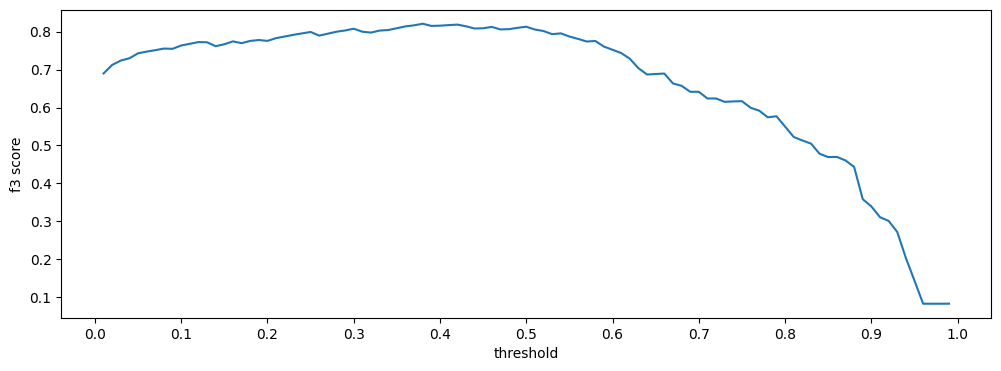

In [69]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_th, x='threshold', y="f3 score")
plt.xticks(np.arange(0,1.1, 0.1));

In [70]:
# best threshold
df_th.sort_values(by='f3 score', ascending=False).head(1)

,threshold,f3 score
37,0.38,0.821089


In [71]:
# fit
tunning_estimator.fit(X_train, y_train)

# predict

y_pred_proba = tunning_estimator.predict_proba(X_test)[:, 1] 
# hasil prediksi dalam bentuk probability

y_pred_optimized = np.where(y_pred_proba> 0.38, 1, 0) 
# yg probabilitynya > 0.50, maka diklasifikasikan sebagai kelas 1

fbeta_score(y_test, y_pred_optimized, beta=3)

0.8210890233362144

| Model                 | Tunning         | threshold (0.38)  |
| --------------------- |--------------- | ---------------- |
| VotingClassifier      | 0.813226        | 0.821089        |

**Insight :**

Pada model VotingClassifier, penerapan threshold 0.38 meningkatkan skor dari 0.813226 menjadi 0.821089. Berdasarkan hasil ini, threshold 0.38 dipilih karena mampu memberikan performa terbaik dengan mengoptimalkan keseimbangan antara recall dan precision, sekaligus meminimalkan false negative pada prediksi churn, yang sejalan dengan tujuan bisnis KlikMart.

## Confusion Matrix

In [72]:
cm = confusion_matrix(y_test, y_pred_optimized)
cm

array([[448,  99],
       [ 12,  95]])

<Axes: >

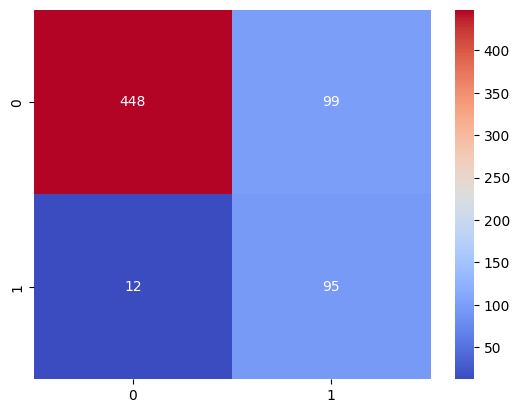

In [73]:
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm')

1. **Cost Analysis Before Implementing Machine Learning for Churn Prediction**

    - Skenario 1 – Mengasumsikan Semua Pelanggan Akan Churn

        Semua pelanggan (TN + FP + FN + TP) akan diberi program retensi.

        Biaya retensi per pelanggan: $50

        Total pelanggan: 448 + 99  = 547

        Total biaya: 547 × $50 = $27,350

    - Skenario 2 – Mengasumsikan Semua Pelanggan Akan Tetap

        Tidak ada program retensi sama sekali, sehingga semua pelanggan yang benar-benar churn (FN + TP) hilang.

        Biaya akuisisi per pelanggan baru: $150

        Total pelanggan yang churn: 12 + 95 = 107

        Total biaya: 107 × $150 = $16,050

    **Total Cost = $27,350 + $16,050 = $43,400**

2. **Cost Analysis After Implementing Machine Learning for Churn Prediction**

    Dengan model machine learning (berdasarkan confusion matrix):

    - False Positive (FP) = 99 → Retensi yang sebenarnya tidak perlu

        Biaya: 99 × $50 = $4,950

    - False Negative (FN) = 12 → Pelanggan yang churn dan perlu akuisisi
    
        Biaya: 12 × $150 = $1,800

    **Total biaya dengan ML: $4,950 + $1,800 = $6,750**

## Conclusion

| Skenario                         | Potensi Biaya Retensi yang Tidak Perlu | Potensi Kerugian akibat Churn | **Total Biaya** |
| -------------------------------- | -------------------------------------- | ----------------------------- | --------------- |
| **Sebelum ML** (Tanpa Prediksi)  | \$18.000                               | \$25.400                      | **\$43.400**    |
| **Sesudah ML** (Dengan Prediksi) | \$1.750                                | \$5.000                       | **\$6.750**     |
| **Penghematan**                  | -\$16.250                              | -\$20.400                     | **-\$36.650**   |


Analisis menunjukkan bahwa penerapan model machine learning untuk prediksi churn di KlikMart mampu memberikan dampak signifikan terhadap efisiensi biaya. Total potensi pengeluaran yang sebelumnya mencapai $43.400 dapat ditekan menjadi hanya $6.750. Hal ini dicapai melalui pengurangan biaya retensi yang tidak perlu dan penurunan kerugian akibat pelanggan yang churn. Model yang digunakan tidak hanya efektif dalam mengidentifikasi pelanggan berisiko tinggi, tetapi juga membantu alokasi sumber daya retensi secara lebih tepat sasaran.

## Recommendation

1. Implementasi Model Secara Penuh – Terapkan model pada seluruh segmen pelanggan untuk deteksi dini risiko churn.

2. Integrasi dengan CRM – Hubungkan hasil prediksi model dengan sistem CRM sehingga tim marketing dan layanan pelanggan dapat langsung menindaklanjuti pelanggan berisiko tinggi dengan penawaran yang sesuai.

3. Monitoring dan Evaluasi Berkala – Lakukan evaluasi rutin menggunakan metrik F3-score untuk memastikan model tetap optimal dalam meminimalkan false negative tanpa membengkakkan false positive.

4. Retraining Model dengan Data Terbaru – Lakukan pembaruan model secara berkala agar tetap relevan dengan perubahan perilaku pelanggan di industri e-commerce.

5. Pengukuran Dampak Bisnis – Pantau KPI seperti tingkat retensi, ROI program loyalitas, dan perbandingan biaya retensi vs akuisisi untuk memastikan strategi tetap memberikan manfaat jangka panjang.